In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
import pandas as pd
import datetime
import time

In [108]:
# Read and convert checkpoints
checkpoints = [l.split('-')[1].strip() for l in open('Jo.txt').readlines()[1:-1]][::-1]
checkpoints = np.array([datetime.datetime.strptime(cp, "%H:%M:%S.%f") for cp in checkpoints])

In [109]:
# Convert checkpoints to split times
splits = (checkpoints - np.roll(checkpoints, 1))[1:]
splits = [split.total_seconds() for split in splits]

In [142]:
# Create a few labels
snatch = ['snatch'] * 10
burpees = ['burpees'] * 15
mvmt = []
round_ = []
for i in range(1,6):
    mvmt += ['snatch'] * 10 * i + ['burpees'] * 15
    round_ += ['snatch_{}'.format(i)] * 10 * i + ['burpees_{}'.format(i)] * 15

In [143]:
df = DataFrame(
    {
        "rep": range(1,226),
        "mvmt": mvmt,
        "split": splits,
        "round": round_
    }
)

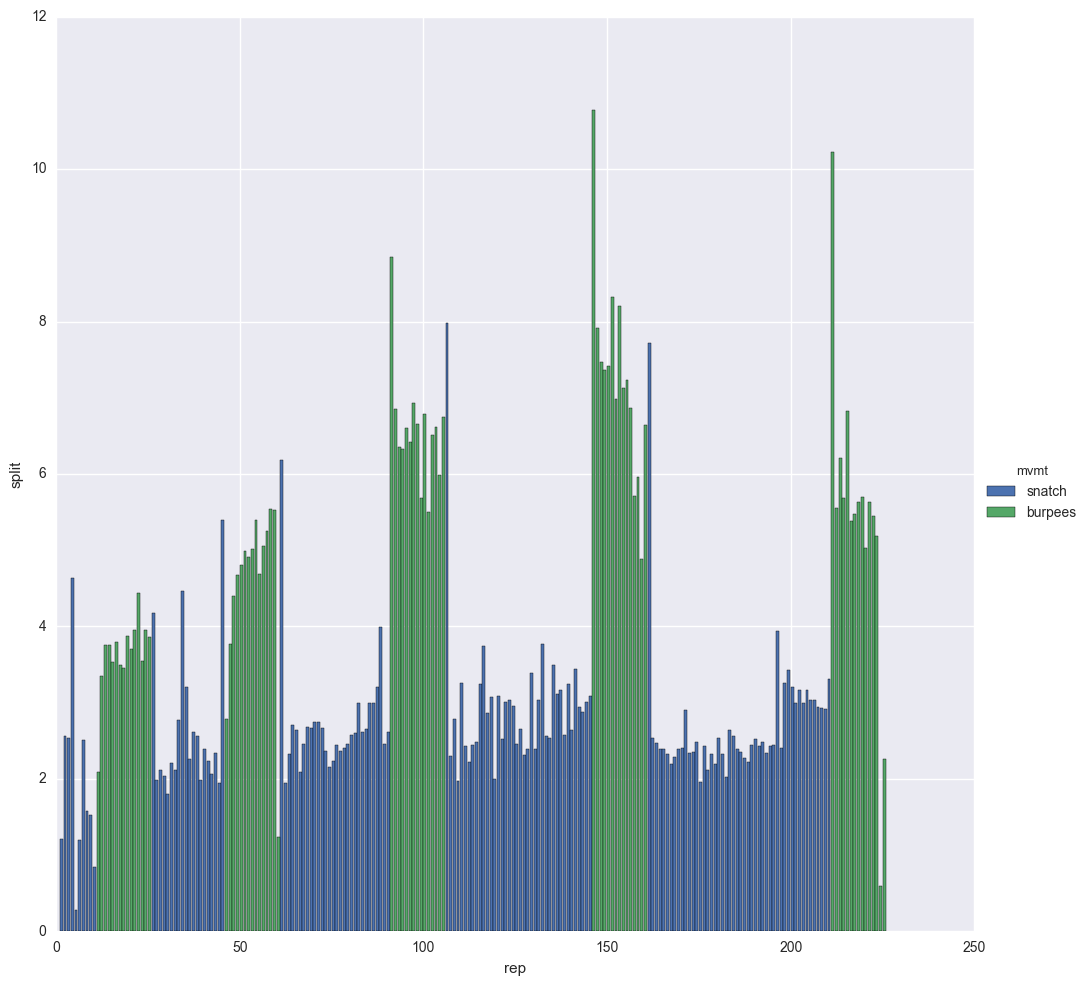

In [147]:
g = sns.FacetGrid(df, size=10, hue='mvmt')
g.map(plt.bar, 'rep', 'split').add_legend()

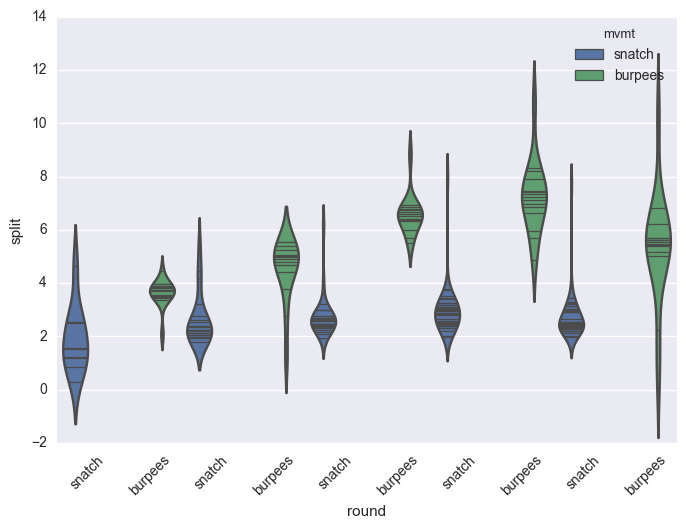

In [160]:
g = sns.violinplot(data=df, x='round', y='split', hue='mvmt', inner="stick")
_ = g.set_xticklabels(
    labels=['snatch', 'burpees'] * 5, rotation=45
)

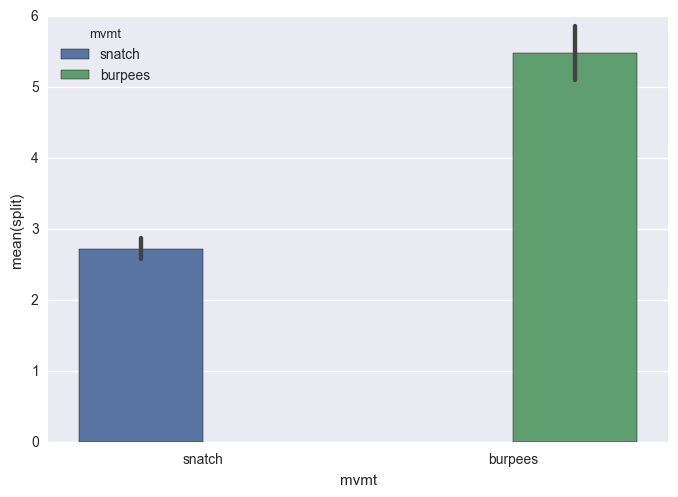

In [114]:
sns.barplot(data=df, x='mvmt', y='split', hue='mvmt')

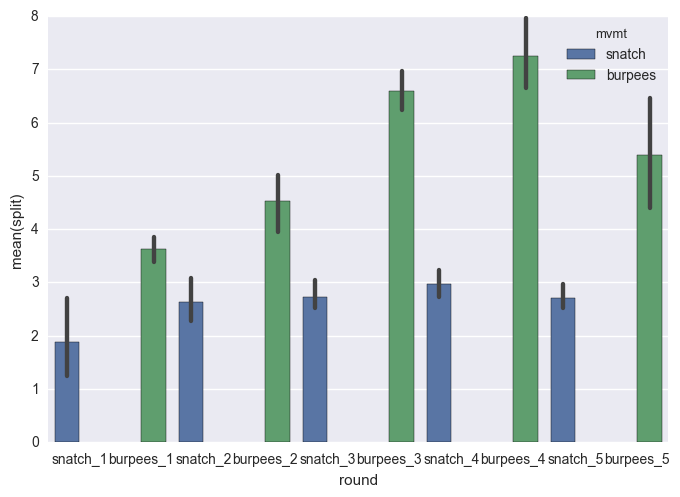

In [163]:
sns.barplot(data=df, x='round', y='split', hue='mvmt')

In [115]:
df.groupby('mvmt')['split'].describe()

mvmt          
burpees  count     75.000000
         mean       5.481733
         std        1.820073
         min        0.600000
         25%        4.175000
         50%        5.530000
         75%        6.650000
         max       10.780000
snatch   count    150.000000
         mean       2.716133
         std        0.913226
         min        0.280000
         25%        2.332500
         50%        2.535000
         75%        2.997500
         max        7.980000
Name: split, dtype: float64